# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [3]:
!pip install palmerpenguins

In [4]:
!pip install scikit-learn

In [5]:
# Code Here
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# import + print first few rows
penguins_df = load_penguins()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
# new table with categorical dummies
# categorical variables - species, island, sex, year
penguins = pd.get_dummies(penguins_df)
penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,NaN,NaN,NaN,NaN,2007,True,False,False,False,False,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from plotnine import *

# Drop rows with missing values
penguins_cleaned = penguins.dropna()

# Define target variable
y = penguins_cleaned['bill_depth_mm']

# Define feature sets for four different models
features_model1 = ['bill_length_mm']
features_model2 = ['bill_length_mm', 'flipper_length_mm']
features_model3 = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g']
features_model4 = [col for col in penguins_cleaned.columns if col != 'bill_depth_mm']

X_model1 = penguins_cleaned[features_model1]
X_model2 = penguins_cleaned[features_model2]
X_model3 = penguins_cleaned[features_model3]
X_model4 = penguins_cleaned[features_model4]


# Split data for each model
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_model1, y, test_size=0.25)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_model2, y, test_size=0.25)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_model3, y, test_size=0.25)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_model4, y, test_size=0.25)

# Fit models
model1 = LinearRegression().fit(X_train1, y_train1)
model2 = LinearRegression().fit(X_train2, y_train2)
model3 = LinearRegression().fit(X_train3, y_train3)
model4 = LinearRegression().fit(X_train4, y_train4)

# Make predictions
y_pred_train1 = model1.predict(X_train1)
y_pred_test1 = model1.predict(X_test1)

y_pred_train2 = model2.predict(X_train2)
y_pred_test2 = model2.predict(X_test2)

y_pred_train3 = model3.predict(X_train3)
y_pred_test3 = model3.predict(X_test3)

y_pred_train4 = model4.predict(X_train4)
y_pred_test4 = model4.predict(X_test4)

# Calculate RMSE scores
train_rmse_scores = [
    np.sqrt(mean_squared_error(y_train1, y_pred_train1)),
    np.sqrt(mean_squared_error(y_train2, y_pred_train2)),
    np.sqrt(mean_squared_error(y_train3, y_pred_train3)),
    np.sqrt(mean_squared_error(y_train4, y_pred_train4))
]

test_rmse_scores = [
    np.sqrt(mean_squared_error(y_test1, y_pred_test1)),
    np.sqrt(mean_squared_error(y_test2, y_pred_test2)),
    np.sqrt(mean_squared_error(y_test3, y_pred_test3)),
    np.sqrt(mean_squared_error(y_test4, y_pred_test4))
]

model_names = ['Model 1 (bill_length_mm)', 'Model 2 (+ flipper_length_mm)', 'Model 3 (+ body_mass_g)', 'Model 4 (All other variables)']

# Create a DataFrame for plotting RMSE
plot_data_rmse = pd.DataFrame({
    'Model': model_names * 2,
    'RMSE': train_rmse_scores + test_rmse_scores,
    'Dataset': ['Training'] * len(train_rmse_scores) + ['Test'] * len(test_rmse_scores)
})

plot_data_rmse

,Model,RMSE,Dataset
0,Model 1 (bill_length_mm),1.930215,Training
1,Model 2 (+ flipper_length_mm),1.539562,Training
2,Model 3 (+ body_mass_g),1.503203,Training
3,Model 4 (All other variables),0.754396,Training
4,Model 1 (bill_length_mm),1.894556,Test
5,Model 2 (+ flipper_length_mm),1.595748,Test
6,Model 3 (+ body_mass_g),1.678735,Test
7,Model 4 (All other variables),0.868777,Test


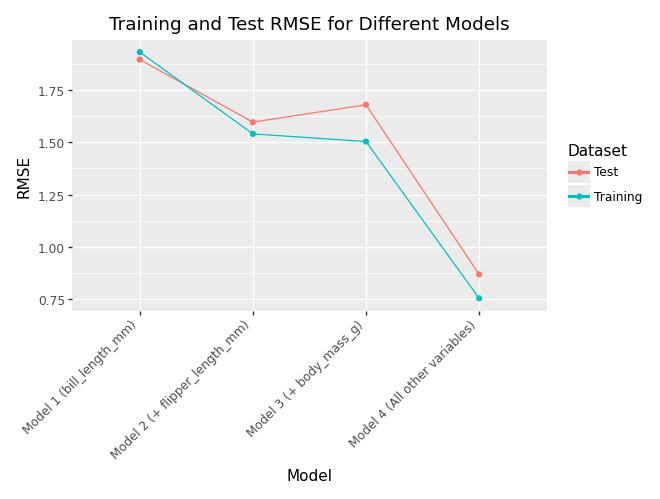

In [8]:
# Create RMSE plot using plotnine
plot_rmse = (
    ggplot(plot_data_rmse, aes(x='Model', y='RMSE', color='Dataset', group='Dataset'))
    + geom_line()
    + geom_point()
    + labs(title='Training and Test RMSE for Different Models',
           x='Model',
           y='RMSE')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

plot_rmse


I believe based on this plot, Model 2 is the best. The difference between the training and test errors is very small, compared to the other models.